# Analysis of the P3 2024 Mock Exam

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Exam_Results.csv')

In [65]:
# Melt the dataframe to long format including total values per question
question_columns = [f'Q{i}_{part}' for i in range(1, 10) for part in ['a', 'b', 'c', 'd', 'Total'] if f'Q{i}_{part}' in df.columns]
df_qs = pd.melt(df, id_vars=['Student'], 
                            value_vars=question_columns, 
                            var_name='Question_Part', 
                            value_name='Marks')

# Separate the Question_Part into two columns: Question and Part
df_qs[['Question', 'Part']] = df_qs['Question_Part'].str.extract(r'(Q\d+)_(\w+)')

# Drop the original 'Question_Part' column
df_qs.drop(columns=['Question_Part'], inplace=True)

# Define the total marks for each question part
total_marks = {
    "Q1_a": 2, "Q1_b": 2, "Q1_c": 2,
    "Q2_a": 3, "Q2_b": 4,
    "Q3_a": 3, "Q3_b": 3,
    "Q4_a": 3, "Q4_b": 3, "Q4_c": 3,
    "Q5_a": 2, "Q5_b": 3, "Q5_c": 3, "Q5_d": 2,
    "Q6_a": 5, "Q6_b": 4,
    "Q7_a": 4, "Q7_b": 4,
    "Q8_a": 3, "Q8_b": 4, "Q8_c": 3,
    "Q9_a": 1, "Q9_b": 6, "Q9_c": 3
}

In [54]:
# Normalize the marks for each question part
exam_results_normalized = df.copy()
for column in exam_results_normalized.columns:
    if column in total_marks:
        exam_results_normalized[column] = exam_results_normalized[column] / total_marks[column]

# Remove the total columns
total_columns = [f'Q{i}_Total' for i in range(1, 10) if f'Q{i}_Total' in df.columns]
exam_results_normalized = exam_results_normalized.drop(columns=total_columns)

# Melt the normalized dataframe to long format for all questions up to Q9
question_columns = [f'Q{i}_{part}' for i in range(1, 10) for part in ['a', 'b', 'c', 'd'] if f'Q{i}_{part}' in df.columns]
df_qn = pd.melt(exam_results_normalized, id_vars=['Student'], 
                                       value_vars=question_columns, 
                                       var_name='Question_Part', 
                                       value_name='Normalized_Marks')

# Separate the Question_Part into two columns: Question and Part
df_qn[['Question', 'Part']] = df_qn['Question_Part'].str.extract(r'(Q\d+)_(\w+)')

# Drop the original 'Question_Part' column
df_qn.drop(columns=['Question_Part'], inplace=True)

## Distribution of overall grades

mean: 42.333, standard deviation: 21.222


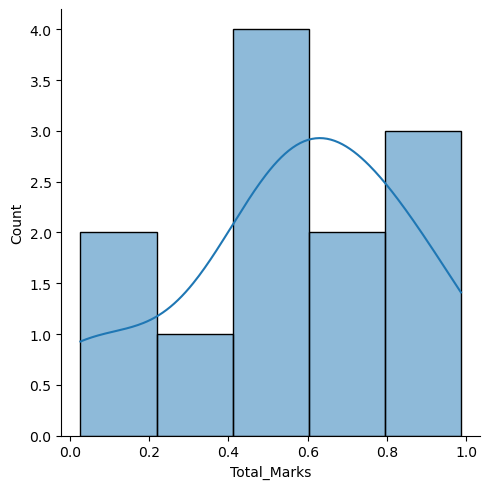

In [42]:
#histogram of normalised marks
sns.displot(df['Total_Marks']/75, kde=True)
print(f'mean: %.3f, standard deviation: %.3f'%(np.mean(df['Total_Marks']),np.std(df['Total_Marks'])))

pmcc: 0.742


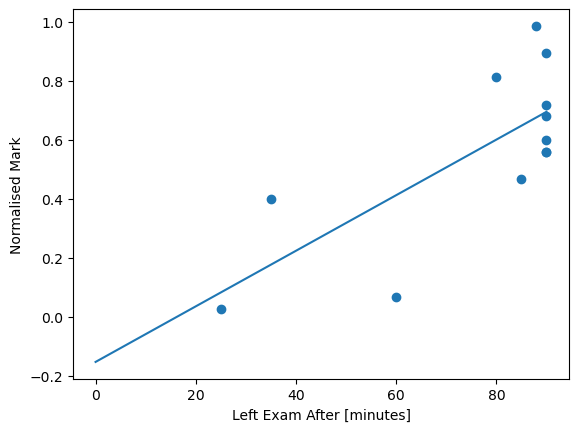

In [73]:
#finish times vs marks
fit,cov = np.polyfit(df['Finish_Time'],df['Total_Marks']/75,1,cov=True)
x = np.linspace(0,90, 50)
r,p = stats.pearsonr(df['Finish_Time'],df['Total_Marks']/75)
plt.scatter(df['Finish_Time'],df['Total_Marks']/75)
plt.plot(x, fit[0]*x+fit[1])
plt.xlabel('Left Exam After [minutes]')
plt.ylabel('Normalised Mark')
print('pmcc: %.3f'%r)


In [81]:
total = df_qs[df_qs['Part'].str.contains('Total')]
parts = df_qs[df_qs['Part'].str.contains('Total')==False]

Marks per question

<Axes: xlabel='Question', ylabel='Marks'>

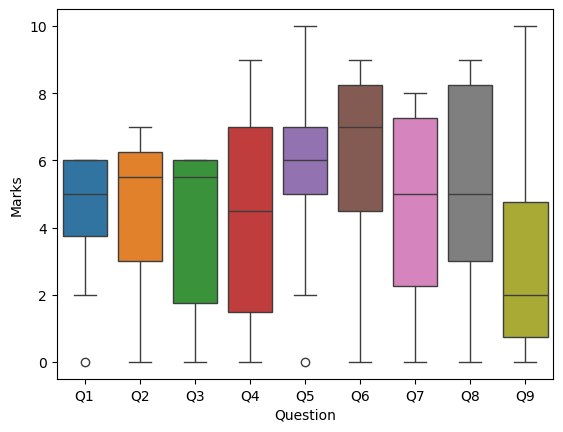

In [72]:
sns.boxplot(data=total, x = 'Question', y = 'Marks',hue='Question')

## Question 1

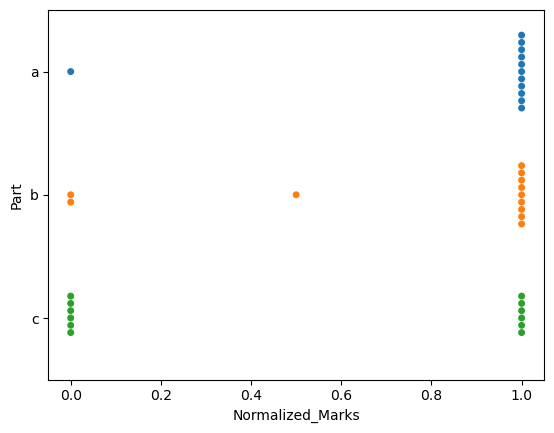

<Axes: xlabel='Normalized_Marks', ylabel='Count'>

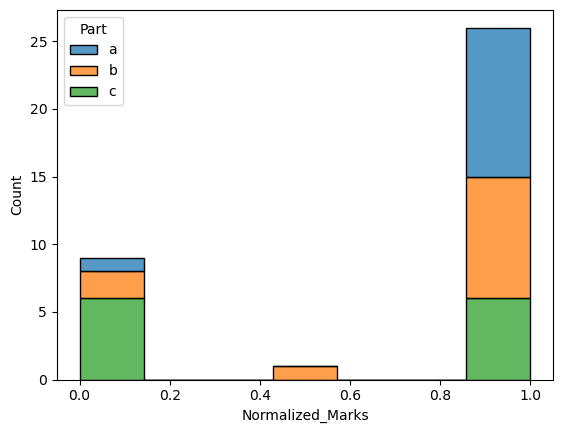

In [107]:
q1 = df_qn[df_qn['Question'].str.contains('Q1')]
sns.swarmplot(data=q1, y = 'Part', x = 'Normalized_Marks',hue='Part')
plt.show()
sns.histplot(data=q1, x = 'Normalized_Marks',hue='Part', multiple='stack')

## Question 2

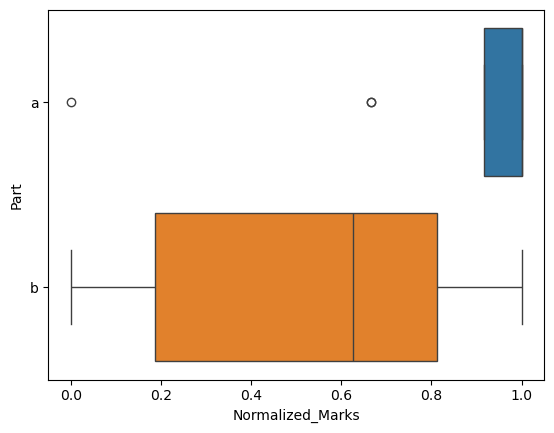

<Axes: xlabel='Normalized_Marks', ylabel='Count'>

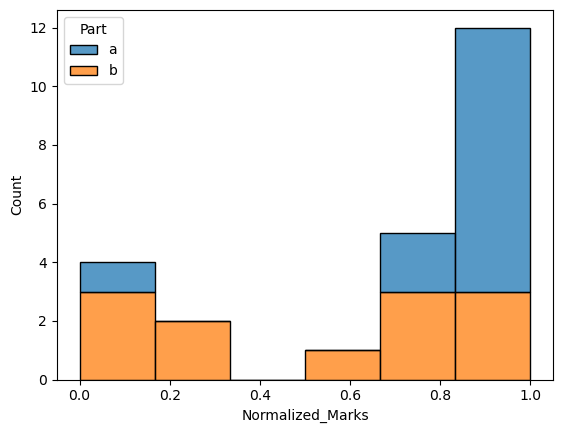

In [99]:
q2 = df_qn[df_qn['Question'].str.contains('Q2')]
sns.boxplot(data=q2, y = 'Part', x = 'Normalized_Marks',hue='Part')
plt.show()
sns.histplot(data=q2, x = 'Normalized_Marks',hue='Part',multiple='stack')

## Question 3

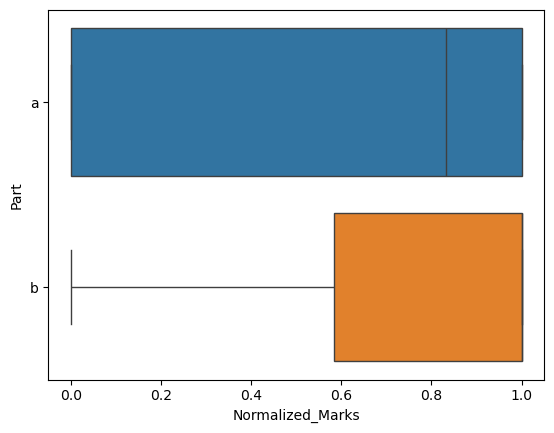

<Axes: xlabel='Normalized_Marks', ylabel='Count'>

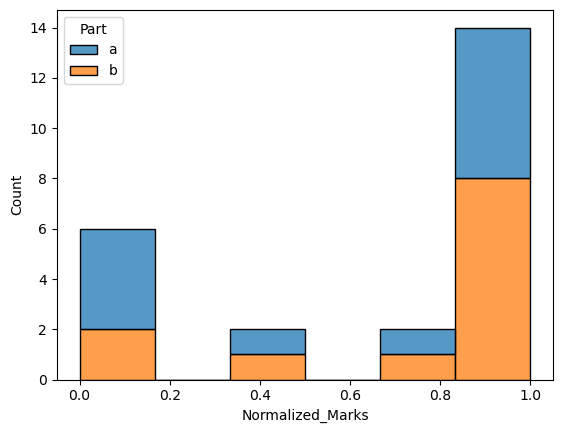

In [97]:
q3 = df_qn[df_qn['Question'].str.contains('Q3')]
sns.boxplot(data=q3, y = 'Part', x = 'Normalized_Marks',hue='Part')
plt.show()
sns.histplot(data=q3, x = 'Normalized_Marks',hue='Part',multiple='stack')

## Question 4

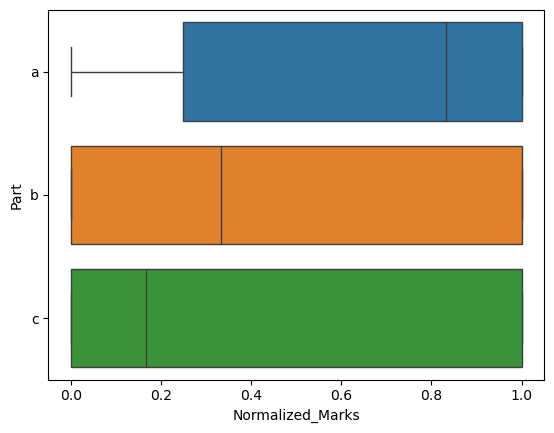

<Axes: xlabel='Normalized_Marks', ylabel='Count'>

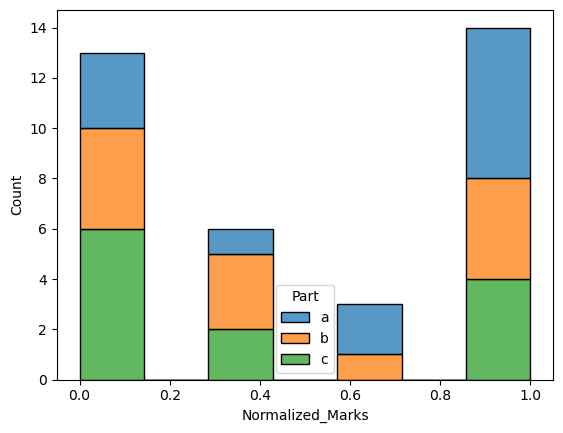

In [105]:
q4 = df_qn[df_qn['Question'].str.contains('Q4')]
sns.boxplot(data=q4, y = 'Part', x = 'Normalized_Marks',hue='Part')
plt.show()
sns.histplot(data=q4, x = 'Normalized_Marks',hue='Part',multiple='stack')

## Question 5

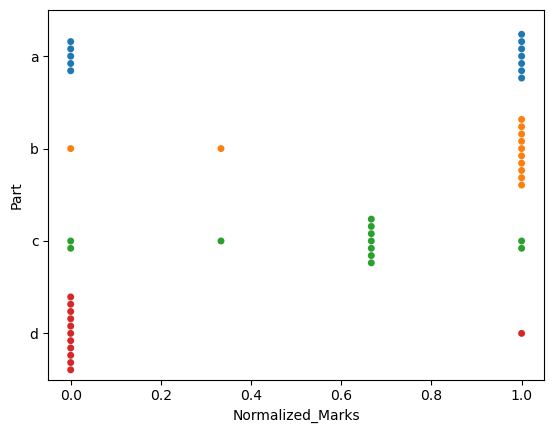

<Axes: xlabel='Normalized_Marks', ylabel='Count'>

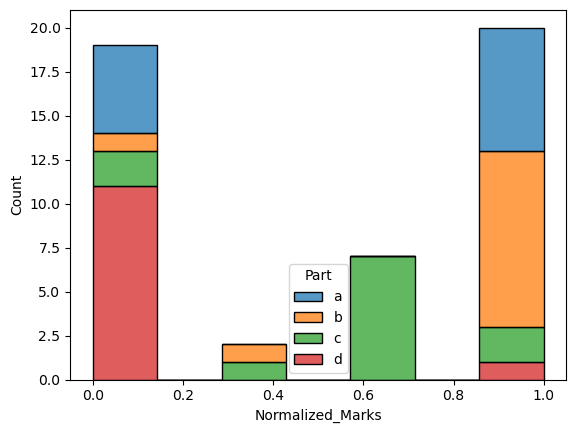

In [110]:
q5 = df_qn[df_qn['Question'].str.contains('Q5')]
sns.swarmplot(data=q5, y = 'Part', x = 'Normalized_Marks',hue='Part')
plt.show()
sns.histplot(data=q5, x = 'Normalized_Marks',hue='Part',multiple='stack')

## Question 6

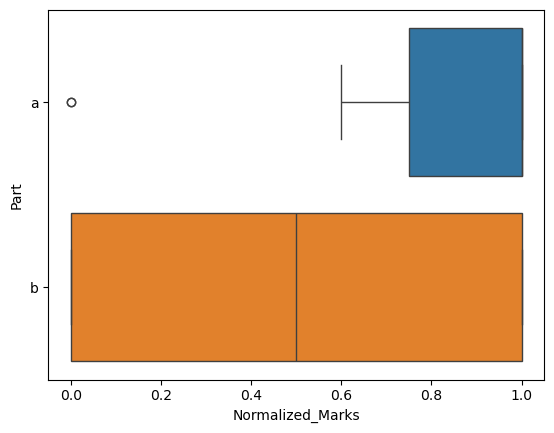

<Axes: xlabel='Normalized_Marks', ylabel='Count'>

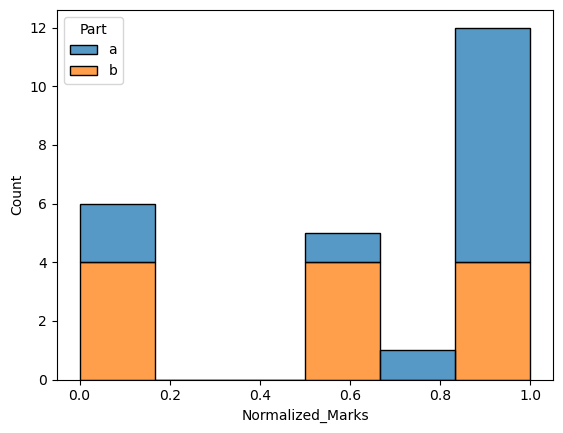

In [111]:
q6 = df_qn[df_qn['Question'].str.contains('Q6')]
sns.boxplot(data=q6, y = 'Part', x = 'Normalized_Marks',hue='Part')
plt.show()
sns.histplot(data=q6, x = 'Normalized_Marks',hue='Part',multiple='stack')

## Question 7

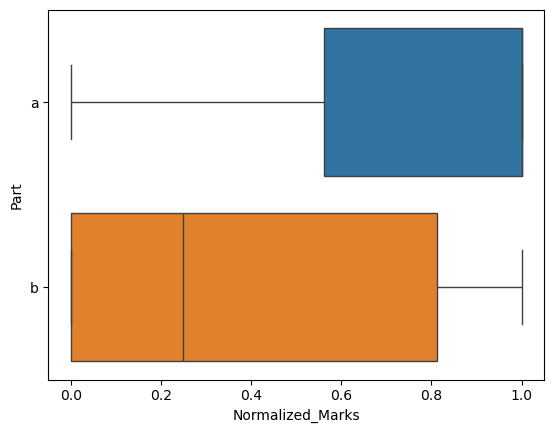

<Axes: xlabel='Normalized_Marks', ylabel='Count'>

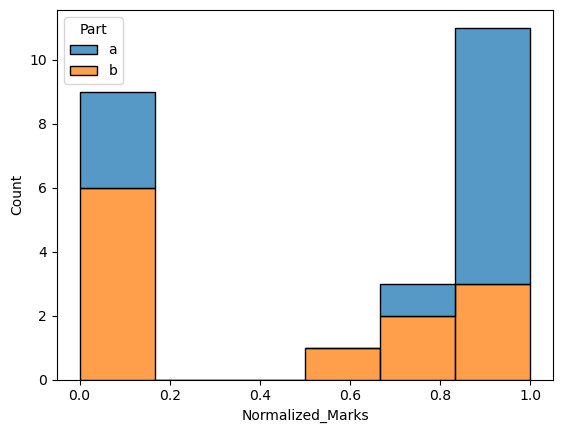

In [113]:
q7 = df_qn[df_qn['Question'].str.contains('Q7')]
sns.boxplot(data=q7, y = 'Part', x = 'Normalized_Marks',hue='Part')
plt.show()
sns.histplot(data=q7, x = 'Normalized_Marks',hue='Part',multiple='stack')

## Question 8

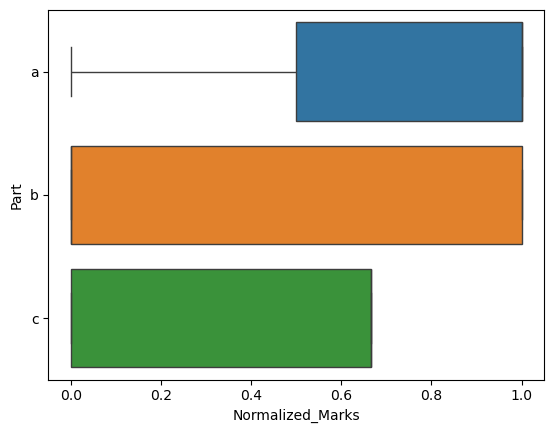

<Axes: xlabel='Normalized_Marks', ylabel='Count'>

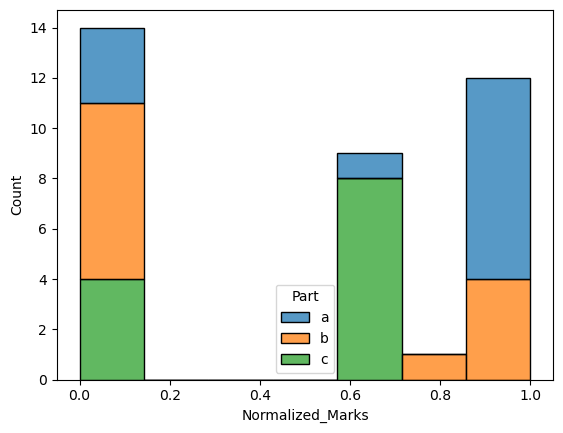

In [115]:
q8 = df_qn[df_qn['Question'].str.contains('Q8')]
sns.boxplot(data=q8, y = 'Part', x = 'Normalized_Marks',hue='Part')
plt.show()
sns.histplot(data=q8, x = 'Normalized_Marks',hue='Part',multiple='stack')

## Question 9

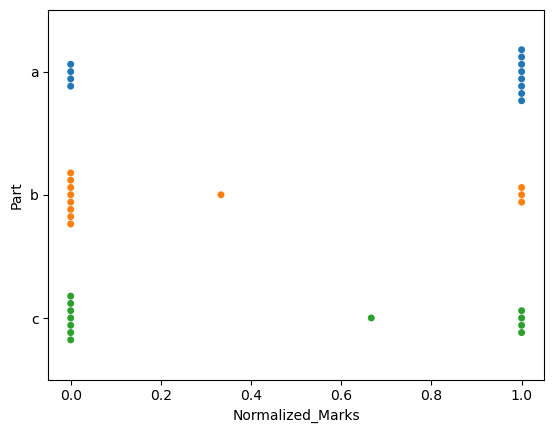

<Axes: xlabel='Normalized_Marks', ylabel='Count'>

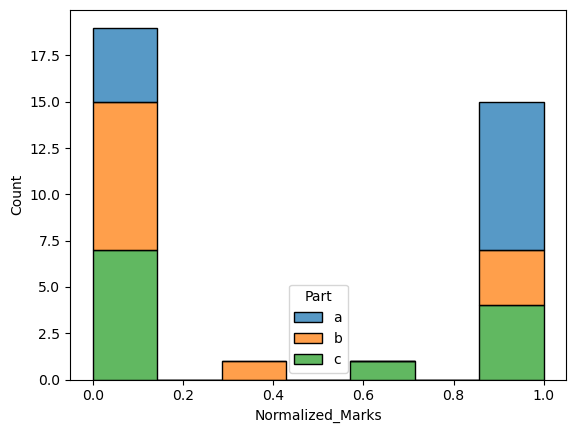

In [118]:
q9 = df_qn[df_qn['Question'].str.contains('Q9')]
sns.swarmplot(data=q9, y = 'Part', x = 'Normalized_Marks',hue='Part')
plt.show()
sns.histplot(data=q9, x = 'Normalized_Marks',hue='Part',multiple='stack')